In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pydataset import data

Define a function named get_lower_and_upper_bounds that has two arguments. 
The first argument is a pandas Series. 
The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
my_list = pd.Series(range(1,101))

In [3]:
print(my_list)

0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     11
11     12
12     13
13     14
14     15
15     16
16     17
17     18
18     19
19     20
20     21
21     22
22     23
23     24
24     25
25     26
26     27
27     28
28     29
29     30
30     31
31     32
32     33
33     34
34     35
35     36
36     37
37     38
38     39
39     40
40     41
41     42
42     43
43     44
44     45
45     46
46     47
47     48
48     49
49     50
50     51
51     52
52     53
53     54
54     55
55     56
56     57
57     58
58     59
59     60
60     61
61     62
62     63
63     64
64     65
65     66
66     67
67     68
68     69
69     70
70     71
71     72
72     73
73     74
74     75
75     76
76     77
77     78
78     79
79     80
80     81
81     82
82     83
83     84
84     85
85     86
86     87
87     88
88     89
89     90
90     91
91     92
92     93
93     94
94     95
95     96
96     97
97     98
98     99
99    100


In [4]:
def get_lower_and_upper_bounds(column, multiplier):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    outer_lower_fence = q1 - (multiplier * iqr)
    outer_upper_fence = q3 + (multiplier * iqr)
    return(outer_lower_fence, outer_upper_fence)

In [5]:
get_lower_and_upper_bounds(my_list, 1.5)

(-48.5, 149.5)

Using lemonade.csv dataset and focusing on continuous variables:

In [6]:
df = pd.read_csv('lemonade.csv')

In [7]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [8]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


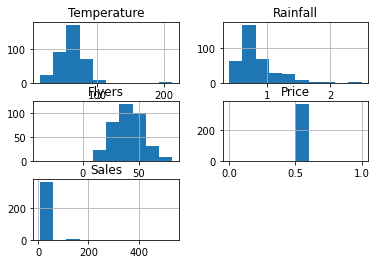

In [9]:
hist = df.hist()

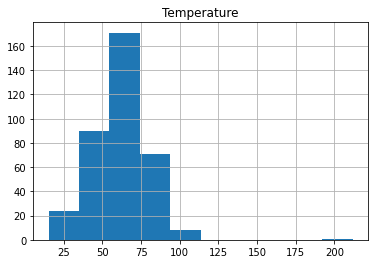

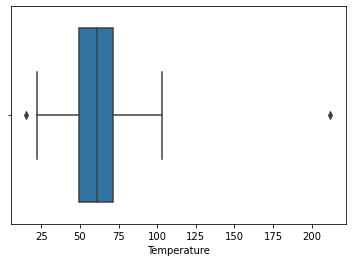

--------


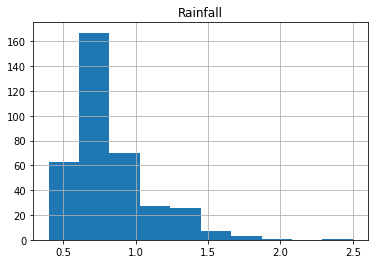

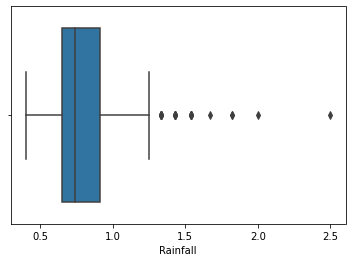

--------


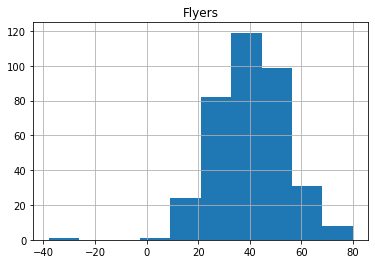

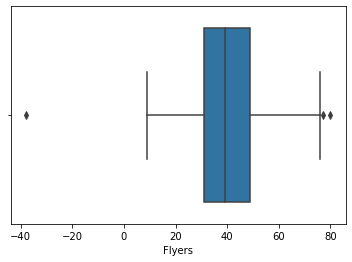

--------


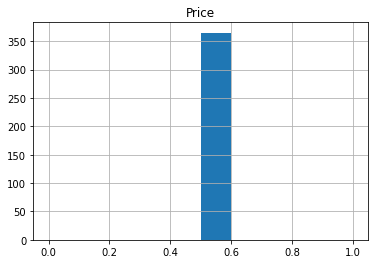

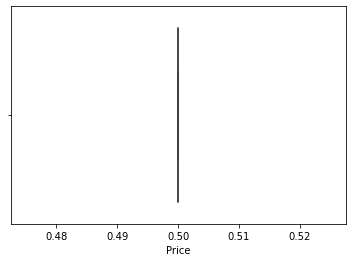

--------


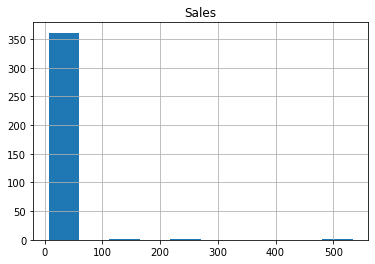

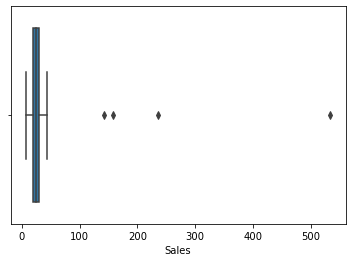

--------


In [10]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()
        print('--------')

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. 

In [11]:
get_lower_and_upper_bounds(df.Temperature, 1.5)

(16.700000000000003, 104.7)

In [12]:
get_lower_and_upper_bounds(df.Rainfall, 1.5)

(0.26, 1.3)

In [13]:
get_lower_and_upper_bounds(df.Flyers, 1.5)

(4.0, 76.0)

In [14]:
get_lower_and_upper_bounds(df.Price, 1.5)

(0.5, 0.5)

In [15]:
get_lower_and_upper_bounds(df.Sales, 1.5)

(5.0, 45.0)

Do these lower outliers make sense? Which outliers should be kept? Do these upper outliers make sense? Which outliers should be kept?

Keep lower: Rainfall and Price, and possibly flyers.
Keep Upper: all

Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept? Do these upper outliers make sense? Which outliers should be kept?

In [16]:
get_lower_and_upper_bounds(df.Temperature, 3)

(-16.299999999999997, 137.7)

In [17]:
get_lower_and_upper_bounds(df.Rainfall, 3)

(-0.13, 1.69)

In [18]:
get_lower_and_upper_bounds(df.Flyers, 3)

(-23.0, 103.0)

In [19]:
get_lower_and_upper_bounds(df.Price, 3)

(0.5, 0.5)

In [20]:
get_lower_and_upper_bounds(df.Sales, 3)

(-10.0, 60.0)

Keep lower:Price and possibly flyers.
Keep Upper: all except flyers

Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
    Use a 2 sigma decision rule to isolate the outliers.
    Do these make sense?
    Should certain outliers be kept or removed?
    
Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

Temperature, Rainfall, and Flyers

In [22]:
# Given some data
import numpy as np
import pandas as pd

In [ ]:
#Calculate the z-score 
z_scores = (df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std()

df['Temperature'] = z_scores

z_scores

df['Temperature'] = z_scores

df[df['Temperature'].abs() >= 2]


df[df['Temperature'].abs() >= 3]

In [23]:
# Calculate the z-score 
z_scores = (df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std()

In [24]:
df['Temperature'] = z_scores

In [25]:
z_scores

0     -1.892340
1     -1.787286
2     -1.477652
3     -0.946852
4     -1.040848
         ...   
360   -1.024260
361   -1.295189
362   -1.201194
363   -1.676702
364   -2.550311
Name: Temperature, Length: 365, dtype: float64

In [26]:
df['Temperature'] = z_scores

In [27]:
df[df['Temperature'].abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,8.336627,0.91,35,0.5,21
166,6/16/17,Friday,2.105251,0.47,77,0.5,41
176,6/26/17,Monday,2.287714,0.47,60,0.5,42
181,7/1/17,Saturday,2.304301,0.47,59,0.5,143
190,7/10/17,Monday,2.033372,0.49,66,0.5,40
198,7/18/17,Tuesday,2.105251,0.47,76,0.5,41
202,7/22/17,Saturday,2.121838,0.47,49,0.5,42
207,7/27/17,Thursday,2.027843,0.47,74,0.5,43
338,12/5/17,Tuesday,-2.168799,1.82,11,0.5,10
364,12/31/17,Sunday,-2.550311,2.50,9,0.5,7


In [28]:
df[df['Temperature'].abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,8.336627,0.91,35,0.5,21


In [29]:
#Calculate the z-score Rainfall
z_scores = (df['Rainfall'] - df['Rainfall'].mean()) / df['Rainfall'].std()

In [30]:
df['Rainfall'] = z_scores

In [31]:
z_scores

0      4.286488
1      1.840253
2      1.840253
3      0.817946
4      0.635391
         ...   
360    0.635391
361    1.548165
362    1.548165
363    2.205363
364    6.112037
Name: Rainfall, Length: 365, dtype: float64

In [32]:
df['Rainfall'] = z_scores

In [33]:
df[df['Rainfall'].abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,-1.892340,4.286488,15,0.5,10
5,1/6/17,Friday,-1.986336,2.606983,23,0.5,11
6,1/7/17,Saturday,-1.566119,2.606983,19,0.5,13
10,1/11/17,Wednesday,-1.582706,2.606983,23,0.5,12
15,1/16/17,Monday,-1.693290,3.081626,24,0.5,12
16,1/17/17,Tuesday,-1.604823,2.205363,26,0.5,14
19,1/20/17,Friday,-1.637998,2.205363,20,0.5,12
23,1/24/17,Tuesday,-1.803873,2.606983,20,0.5,12
337,12/4/17,Monday,-1.455535,2.606983,16,0.5,13
338,12/5/17,Tuesday,-2.168799,3.629291,11,0.5,10


In [34]:
df[df['Rainfall'].abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,-1.892340,4.286488,15,0.5,10
15,1/16/17,Monday,-1.693290,3.081626,24,0.5,12
338,12/5/17,Tuesday,-2.168799,3.629291,11,0.5,10
343,12/10/17,Sunday,-1.654586,3.629291,15,0.5,11
364,12/31/17,Sunday,-2.550311,6.112037,9,0.5,7


In [35]:
#Calculate the z-score Flyers
z_scores = (df['Flyers'] - df['Flyers'].mean()) / df['Flyers'].std()

In [36]:
df['Flyers'] = z_scores

In [37]:
z_scores

0     -1.820927
1     -1.820927
2     -0.950507
3     -0.877972
4     -0.515297
         ...   
360   -0.515297
361   -0.587832
362   -1.675857
363   -1.313182
364   -2.256137
Name: Flyers, Length: 365, dtype: float64

In [38]:
df['Flyers'] = z_scores

In [39]:
df[df['Flyers'].abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,2.105251,-1.299691,2.676244,0.5,41
170,6/20/17,Tuesday,1.320109,-1.044114,2.168499,0.5,37
171,6/21/17,Wednesday,1.828792,-1.299691,2.603709,0.5,41
182,7/2/17,Sunday,1.779030,-1.153647,2.023429,0.5,158
183,7/3/17,Monday,1.121058,-1.044114,2.023429,0.5,235
194,7/14/17,Friday,1.701621,-1.190158,2.893849,0.5,40
198,7/18/17,Tuesday,2.105251,-1.299691,2.603709,0.5,41
203,7/23/17,Sunday,1.541275,-1.153647,2.313569,0.5,37
204,7/24/17,Monday,1.231642,-0.934581,2.095964,0.5,35
207,7/27/17,Thursday,2.027843,-1.299691,2.458639,0.5,43


In [40]:
df[df['Flyers'].abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,-0.786506,0.452836,-5.665283,0.5,20


In [41]:
#Calculate the z-score 
z_scores = (df['Sales'] - df['Sales'].mean()) / df['Sales'].std()

In [42]:
df['Sales'] = z_scores

In [43]:
z_scores

0     -0.577281
1     -0.480344
2     -0.415720
3     -0.351096
4     -0.318783
         ...   
360   -0.286471
361   -0.383408
362   -0.415720
363   -0.480344
364   -0.674217
Name: Sales, Length: 365, dtype: float64

In [44]:
df['Sales'] = z_scores

In [45]:
df[df['Sales'].abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,2.304301,-1.299691,1.370614,0.5,3.720233
182,7/2/17,Sunday,1.779030,-1.153647,2.023429,0.5,4.204914
183,7/3/17,Monday,1.121058,-1.044114,2.023429,0.5,6.692948
184,7/4/17,Tuesday,1.270346,-0.861559,0.645264,0.5,16.354275


In [46]:
df[df['Sales'].abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,2.304301,-1.299691,1.370614,0.5,3.720233
182,7/2/17,Sunday,1.779030,-1.153647,2.023429,0.5,4.204914
183,7/3/17,Monday,1.121058,-1.044114,2.023429,0.5,6.692948
184,7/4/17,Tuesday,1.270346,-0.861559,0.645264,0.5,16.354275


In [48]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')

In [49]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,-1.892340,4.286488,-1.820927,0.5,-0.577281
2017-01-02,Monday,-1.787286,1.840253,-1.820927,0.5,-0.480344
2017-01-03,Tuesday,-1.477652,1.840253,-0.950507,0.5,-0.415720
2017-01-04,Wednesday,-0.946852,0.817946,-0.877972,0.5,-0.351096
2017-01-05,Thursday,-1.040848,0.635391,-0.515297,0.5,-0.318783


In [50]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,3.650000e+02,3.650000e+02,3.650000e+02,365.0,3.650000e+02
mean,-1.883425e-15,-2.958972e-15,9.976799e-17,0.5,4.012011e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00
min,-2.550311e+00,-1.555267e+00,-5.665283e+00,0.5,-6.742169e-01
25%,-6.372181e-01,-6.424931e-01,-6.603667e-01,0.5,-2.541592e-01
50%,-6.892529e-03,-3.138943e-01,-8.008661e-02,0.5,-9.259859e-02
75%,5.791996e-01,3.067922e-01,6.452636e-01,0.5,6.896205e-02
max,8.336627e+00,6.112037e+00,2.893849e+00,0.5,1.635427e+01
